# [★★☆☆☆] Calibration of the Subloading Surface Model

The subloading surface framework provides advantageous features that conventional plasticity models do not offer when it comes to modelling cyclic behaviour.

In this example, we demonstrate the performance and how to calibrate the [Subloading1D](../../../Library/Material/Material1D/vonMises/Subloading1D.md) model.

We mainly use the data presented in [this monograph](https://doi.org/10.1007/978-3-030-93138-4).

To make life easier, we first define some utility functions.

In [1]:
from dataclasses import dataclass
from os import system
from h5py import File
import matplotlib.pyplot as plt


@dataclass
class Curve:
    name: str
    x: list[float]
    y: list[float]


def execute(name: str, content: str):
    with open("example.sp", "w") as f:
        f.write(content)

    system("suanpan -np -f example.sp")

    with File("RESULT.h5") as f:
        return Curve(name, f["dataset"][:, 0], f["dataset"][:, 1])


def plot(title: str, curves: list[Curve]):
    for curve in curves:
        plt.plot(curve.x, curve.y, label=curve.name)
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.title(title)
    plt.show()

## Smooth Transition

We consider a very basic, elastic-perfectly plastic response.
We choose a moderate value $$400~\text{MPa}$$ for initial yield stress.

The evolution rate $$u$$ of yield ratio controls the curvature.
A higher value $$u$$ results in a faster approaching, making the response closer to conventional elastic-perfectly plastic.
However, the conventional bi-linear response is not realistic, and the stiffness shows a discontinuity/jump at the yielding point.

The introduction of yield ratio $$z$$ ensures a controllable smooth transition from the conventional 'elastic' region to the 'plastic' one.

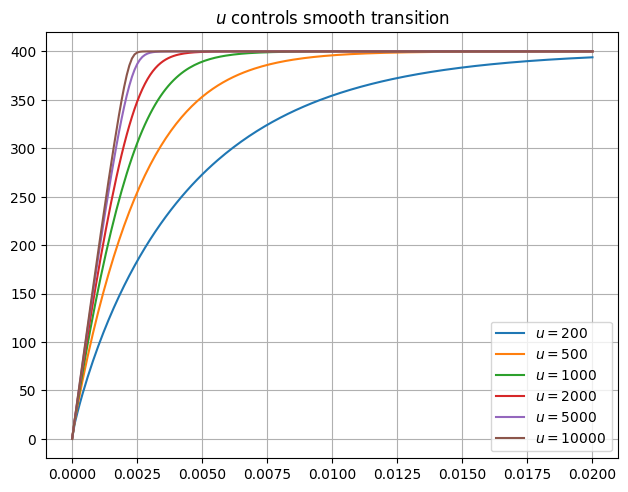

In [2]:
plot(
    "$u$ controls smooth transition",
    [
        execute(
            "$u=200$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
2E2 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$u=500$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
5E2 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$u=1000$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
1E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$u=2000$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$u=5000$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
5E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$u=10000$",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 0 0 0 \
1E4 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
    ],
)


## Isotropic Hardening

On top of the initial yield stress, a saturation can be added.
The response exponentially approaches the saturation stress, this can be accompanied with a linear hardening as well.

Here, we choose a linear hardening modulus $$2000~\text{MPa}$$, which is $$0.1$$ of elastic modulus.
However, this hardening modulus is measured with plastic strain, the total response would present a different slope.
We further choose a saturation of $$200~\text{MPa}$$, so the total stress shall be $$600~\text{MPa}$$, in absence of linear hardening.

We shall see that $$m^s_\text{iso}$$ controls saturation speed.

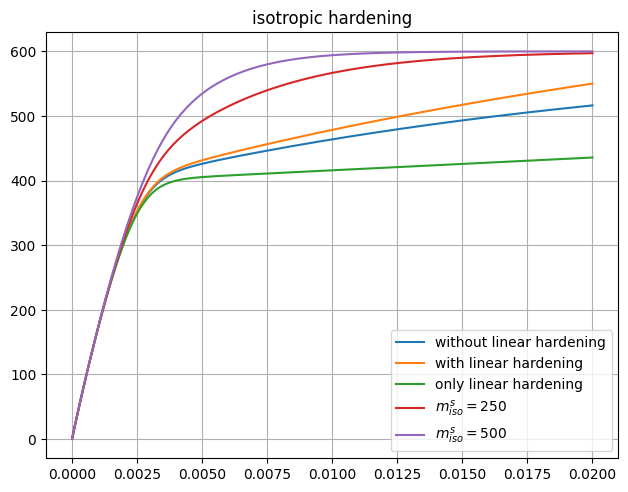

In [3]:
plot(
    "isotropic hardening",
    [
        execute(
            "without linear hardening",
            """
material Subloading1D 1 2E5 \
400 0 200 50 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "with linear hardening",
            """
material Subloading1D 1 2E5 \
400 2000 200 50 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "only linear hardening",
            """
material Subloading1D 1 2E5 \
400 2000 0 0 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$m^s_{iso}=250$",
            """
material Subloading1D 1 2E5 \
400 0 200 250 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "$m^s_{iso}=500$",
            """
material Subloading1D 1 2E5 \
400 0 200 500 \
0 0 0 0 \
2E3 0 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
    ],
)

## Kinematic Hardening

Similarly, kinematic hardening also saturated to $$a^i$$.
In additional to that, since it is defined that the saturation itself is not a constant, itself can be saturated again.
We choose a $$a^i=100~\text{MPa}$$ with potentially another $$150~\text{MPa}$$ saturation, resulting in $$500~\text{MPa}$$ to $$650~\text{MPa}$$ in total, depending on the configuration.

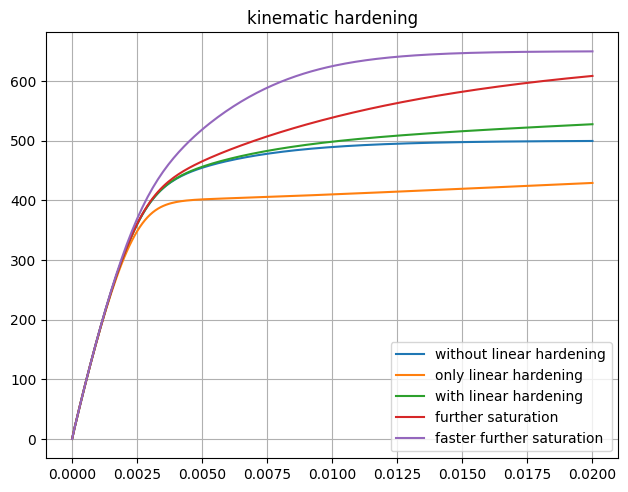

In [4]:
plot(
    "kinematic hardening",
    [
        execute(
            "without linear hardening",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
100 0 0 0 \
2E3 300 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "only linear hardening",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
0 2000 0 0 \
2E3 300 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "with linear hardening",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
100 2000 0 0 \
2E3 300 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "further saturation",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
100 0 150 100 \
2E3 300 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
        execute(
            "faster further saturation",
            """
material Subloading1D 1 2E5 \
400 0 0 0 \
100 0 150 500 \
2E3 500 0 0

materialTest1D 1 1E-4 200

exit
""",
        ),
    ],
)

## Ratcheting

The original subloading surface model shows excessive plastic strain accumulation under cyclic loading.
The extended version addresses such an issue with the assist of the elastic core.
It is controlled by $z_e$ and $c_e$, the former controls the size, while the latter controls the rate.

To illustrate, we choose a bilinear hardening model as the basis.

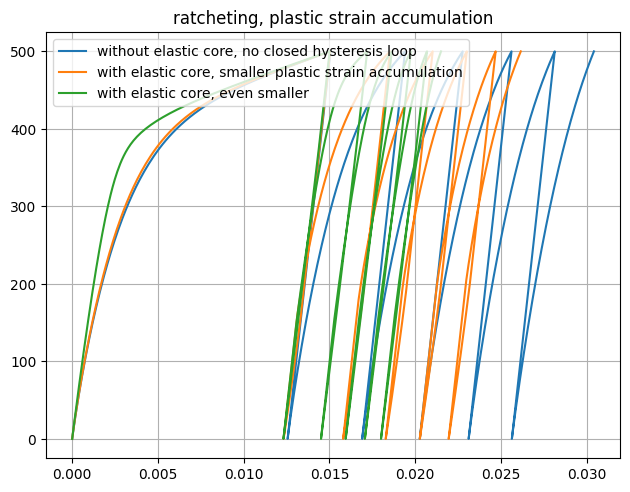

In [5]:
plot(
    "ratcheting, plastic strain accumulation",
    [
        execute(
            "without elastic core, no closed hysteresis loop",
            """
material Subloading1D 1 2E5 \
400 8000 0 0 \
0 0 0 0 \
5E2 0 0 0

materialTestByLoad1D 1 5 100 100 100 100 100 100 100 100 100 100 100

exit
""",
        ),
        execute(
            "with elastic core, smaller plastic strain accumulation",
            """
material Subloading1D 1 2E5 \
400 8000 0 0 \
0 0 0 0 \
5E2 0 1E2 0.5

materialTestByLoad1D 1 5 100 100 100 100 100 100 100 100 100 100 100

exit
""",
        ),
        execute(
            "with elastic core, even smaller",
            """
material Subloading1D 1 2E5 \
400 8000 0 0 \
0 0 0 0 \
5E2 0 2E3 0.8

materialTestByLoad1D 1 5 100 100 100 100 100 100 100 100 100 100 100

exit
""",
        ),
    ],
)

## Test Data

We show a few example calibrations based on test data shown in the [monograph](https://doi.org/10.1007/978-3-030-93138-4).

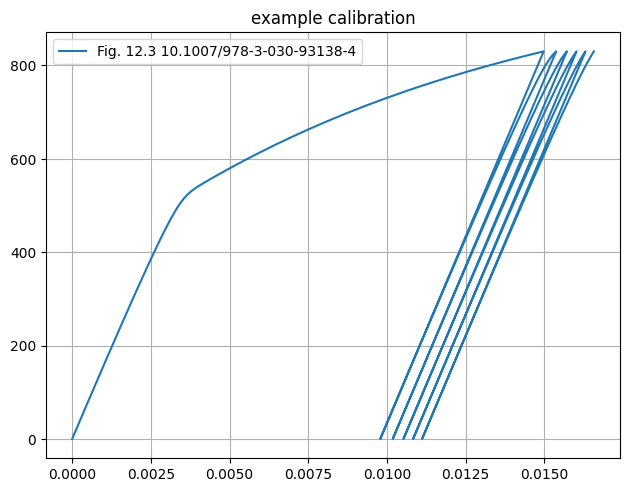

In [6]:
plot(
    "example calibration",
    [
        execute(
            "Fig. 12.3 10.1007/978-3-030-93138-4",
            """
material Subloading1D 1 1.6E5 \
507 0 294 170 \
254 0 147 170 \
1E4 30 6 0.5

materialTestByLoad1D 1 8.3 100 100 100 100 100 100 100 100 100 100 100

exit
""",
        ), 
    ],
)

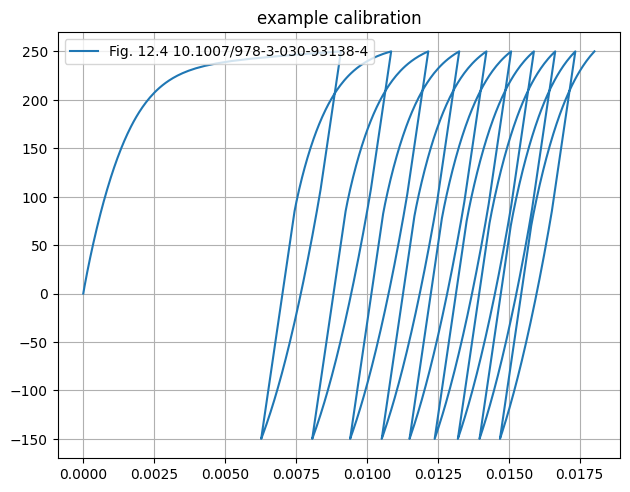

In [7]:
plot(
    "example calibration",
    [
        execute(
            "Fig. 12.4 10.1007/978-3-030-93138-4",
            """
material Subloading1D 1 2E5 \
232 0 70 30 \
209 0 63 30 \
1E3 2 143 0.7

materialTestByLoad1D 1 2.5 100 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160

exit
""",
        ), 
    ],
)